# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

In [4]:
df = pd. read_csv('movies_metadata.csv')

C:\Users\Dell\AppData\Local\Temp\ipykernel_18188\633466632.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd. read_csv('movies_metadata.csv')


# Exploring the Data

In [5]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


# Data Cleaning

In [8]:
# Handling missing values
df.dropna(inplace=True)

In [9]:
# Removing duplicates
df.drop_duplicates(inplace=True)

# Data Visualization

## Line Plots

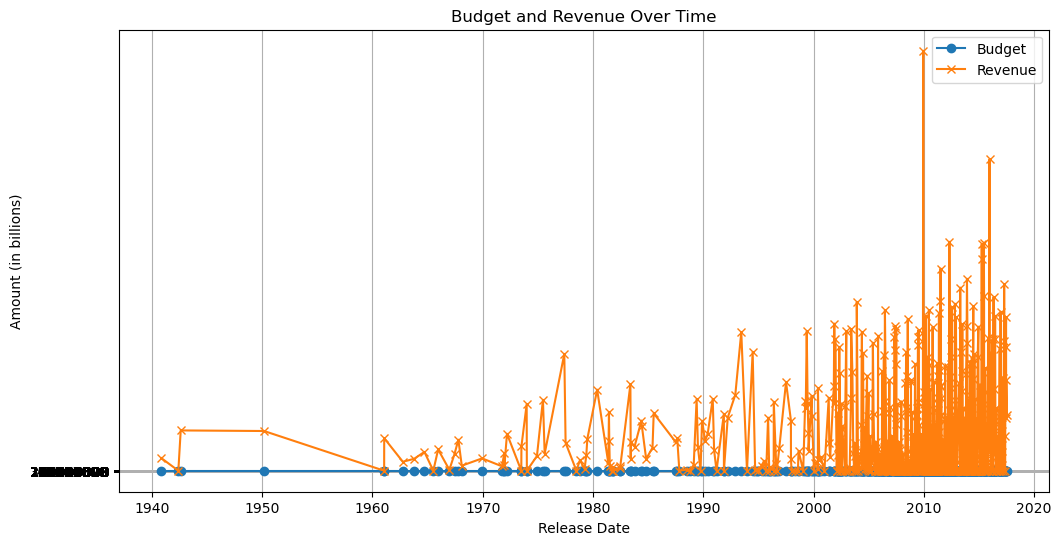

In [12]:
# Convert 'release_date' column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Sort the DataFrame by release date
df.sort_values(by='release_date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['release_date'], df['budget'], label='Budget', marker='o')
plt.plot(df['release_date'], df['revenue'], label='Revenue', marker='x')
plt.title('Budget and Revenue Over Time')
plt.xlabel('Release Date')
plt.ylabel('Amount (in billions)')
plt.legend()
plt.grid(True)
plt.show()

# Bar Plot

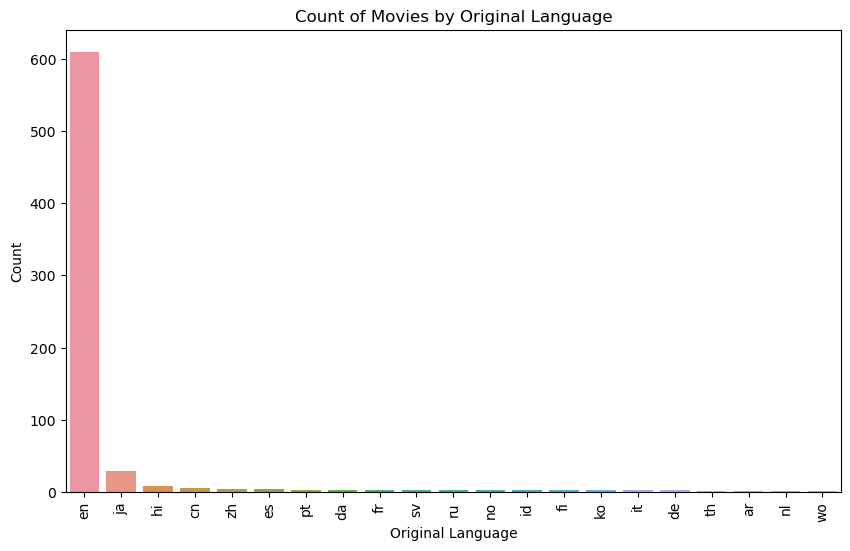

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='original_language', data=df, order=df['original_language'].value_counts().index)
plt.title('Count of Movies by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


# Scatter Plot

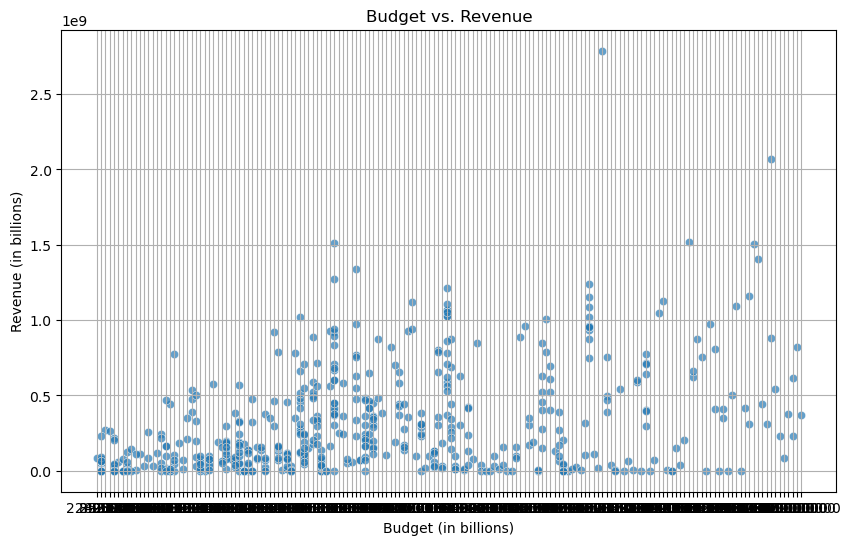

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.7)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget (in billions)')
plt.ylabel('Revenue (in billions)')
plt.grid(True)
plt.show()


# Customizing Visualizations

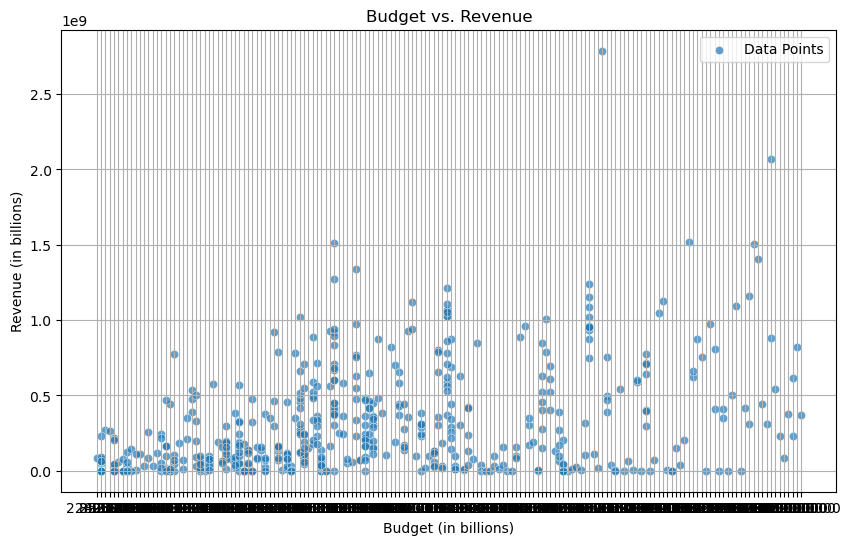

In [15]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.7)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget (in billions)')
plt.ylabel('Revenue (in billions)')
plt.grid(True)

# Customize legend
scatter_plot.legend(['Data Points'], loc='upper right')

plt.show()


# Data Analysis and Insights

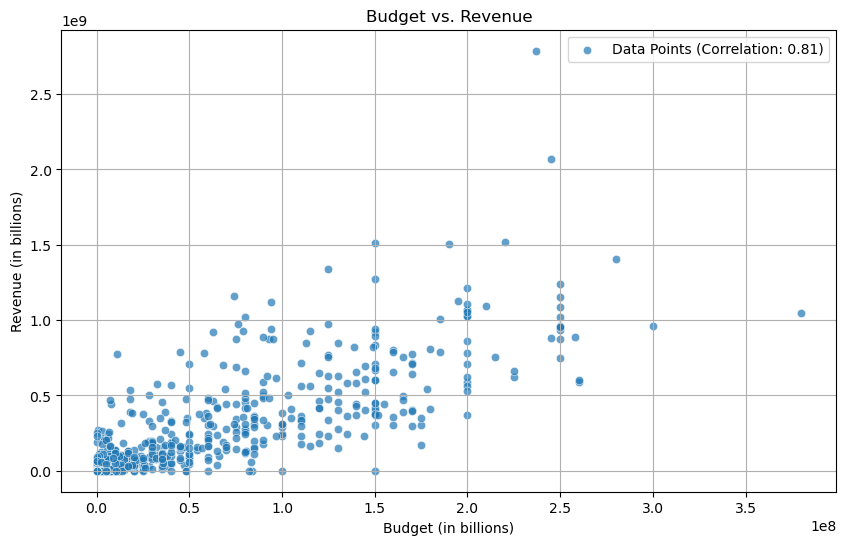

Correlation coefficient between 'budget' and 'revenue': 0.81


In [18]:
# Convert 'budget' and 'revenue' columns to numeric
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Calculate the correlation coefficient
correlation_coefficient = df['budget'].corr(df['revenue'])

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.7)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget (in billions)')
plt.ylabel('Revenue (in billions)')
plt.grid(True)

# Customize legend
scatter_plot.legend([f'Data Points (Correlation: {correlation_coefficient:.2f})'], loc='upper right')

plt.show()

# Print the correlation coefficient
print(f"Correlation coefficient between 'budget' and 'revenue': {correlation_coefficient:.2f}")


# Correlation Analysis

C:\Users\Dell\AppData\Local\Temp\ipykernel_18188\115581643.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


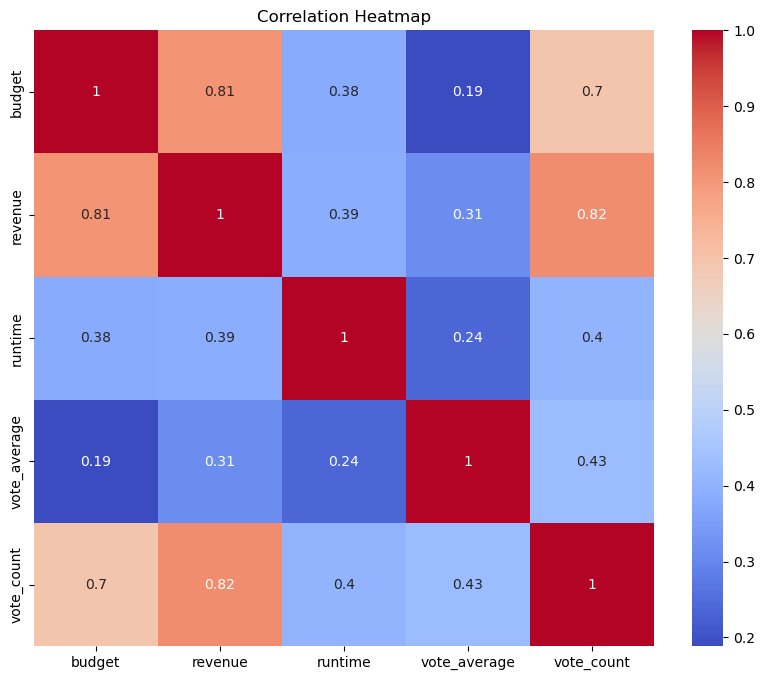

In [19]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Grouped Bar Plots

C:\Users\Dell\AppData\Local\Temp\ipykernel_18188\2937918404.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='original_language', y='budget', data=df, ci=None, label='Budget')
C:\Users\Dell\AppData\Local\Temp\ipykernel_18188\2937918404.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='original_language', y='revenue', data=df, ci=None, label='Revenue', alpha=0.7)


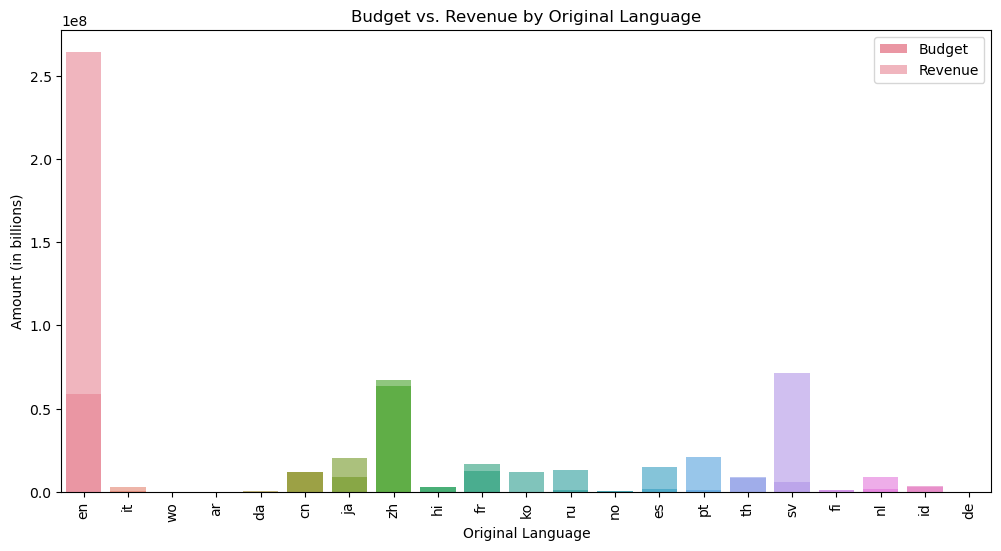

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x='original_language', y='budget', data=df, ci=None, label='Budget')
sns.barplot(x='original_language', y='revenue', data=df, ci=None, label='Revenue', alpha=0.7)
plt.title('Budget vs. Revenue by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Amount (in billions)')
plt.xticks(rotation=90)
plt.legend()
plt.show()


#  Box Plots

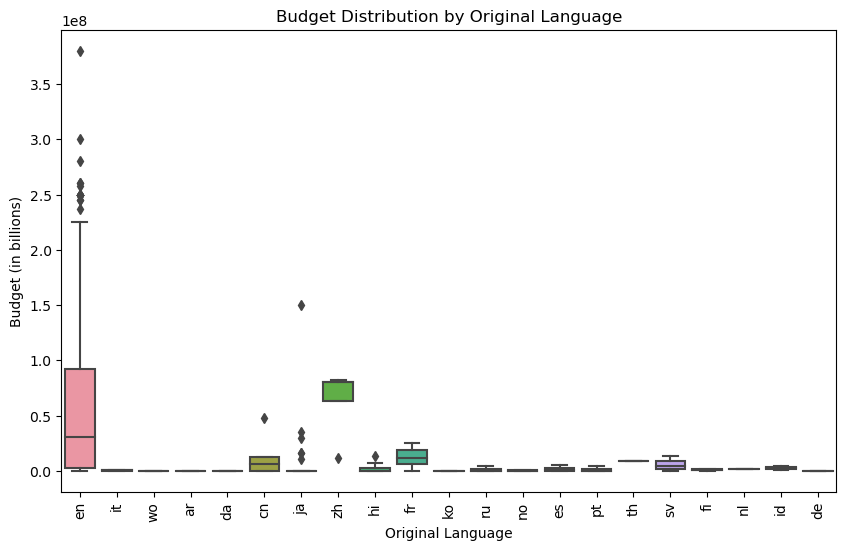

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='original_language', y='budget', data=df)
plt.title('Budget Distribution by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Budget (in billions)')
plt.xticks(rotation=90)
plt.show()
